# 선형회귀 알고리즘 시각화

# 1. Multiple Linear Regression (HS~country+...)

In [3]:
# install.packages('caTools')
library(caTools)
set.seed(4)
setwd("C:/Users/CHA-LAPTOP/Downloads/Jupyter Notebook/")
df <-read.csv("happy_0814.csv")
attach(df)

The following object is masked _by_ .GlobalEnv:

    year

The following objects are masked from df (pos = 3):

    alcohol, birth, continent, corruption, country, country_num,
    freedom, generosity, HS, life_exp, log_gdp, mental, obesity,
    schooling, social, suicide, year



In [4]:
df$country <- as.factor(df$country)
df$year <- as.factor(df$year)
df$country_num <- as.factor(df$country_num)
df$continent <- as.factor(df$continent)
str(df)
summary(df)

'data.frame':	1881 obs. of  17 variables:
 $ country    : Factor w/ 153 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year       : Factor w/ 16 levels "2005","2006",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ HS         : num  3.72 4.4 4.76 3.83 3.78 ...
 $ log_gdp    : num  7.37 7.54 7.65 7.62 7.71 ...
 $ social     : num  0.451 0.552 0.539 0.521 0.521 0.484 0.526 0.529 0.559 0.491 ...
 $ life_exp   : num  50.8 51.2 51.6 51.9 52.2 ...
 $ freedom    : num  0.718 0.679 0.6 0.496 0.531 0.578 0.509 0.389 0.523 0.427 ...
 $ generosity : num  0.168 0.19 0.121 0.162 0.236 0.061 0.104 0.08 0.042 -0.121 ...
 $ corruption : num  0.882 0.85 0.707 0.731 0.776 0.823 0.871 0.881 0.793 0.954 ...
 $ schooling  : num  3 3.1 3.2 3.3 3.4 3.5 3.5 3.6 3.6 3.8 ...
 $ alcohol    : num  0.79 0.771 0.757 0.74 0.724 ...
 $ suicide    : num  0.59 0.605 0.626 0.646 0.658 ...
 $ obesity    : num  5.77 6.23 6.6 6.87 7.08 7.34 7.34 7.37 7.45 8.5 ...
 $ birth      : num  6.37 6.18 5.98 5.77 5.56 ...
 $ mental     : num

       country          year            HS           log_gdp      
 Georgia   :  17   2017   : 142   Min.   :2.375   Min.   : 6.635  
 Argentina :  15   2019   : 140   1st Qu.:4.641   1st Qu.: 8.480  
 Bangladesh:  15   2011   : 139   Median :5.387   Median : 9.472  
 Bolivia   :  15   2014   : 138   Mean   :5.478   Mean   : 9.380  
 Brazil    :  15   2015   : 137   3rd Qu.:6.313   3rd Qu.:10.356  
 Cambodia  :  15   2018   : 137   Max.   :8.019   Max.   :11.648  
 (Other)   :1789   (Other):1048                                   
     social          life_exp        freedom         generosity       
 Min.   :0.2900   Min.   :32.30   Min.   :0.2580   Min.   :-0.335000  
 1st Qu.:0.7510   1st Qu.:59.20   1st Qu.:0.6490   1st Qu.:-0.116000  
 Median :0.8390   Median :65.28   Median :0.7660   Median :-0.029000  
 Mean   :0.8146   Mean   :63.54   Mean   :0.7437   Mean   :-0.001192  
 3rd Qu.:0.9080   3rd Qu.:68.68   3rd Qu.:0.8560   3rd Qu.: 0.089000  
 Max.   :0.9870   Max.   :77.10   Max.

In [5]:
# 정규화 (minmax)
normalize <- function(x){
  return((x-min(x))/(max(x)-min(x)))
}
dfnor <- as.data.frame(lapply(df[4:15],normalize))
dfnor[c('HS','year','country','country_num','continent')] <- df[c('HS','year','country','country_num','continent')]
summary(dfnor)
# 모델 만들기 (HS~ Country + ...)
model_nor <-lm(HS ~ country +log_gdp + social + life_exp + freedom + generosity + corruption + schooling +
                 alcohol + suicide + obesity + birth + mental, data=dfnor)
summary(model_nor)

    log_gdp           social          life_exp         freedom      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.3680   1st Qu.:0.6614   1st Qu.:0.6004   1st Qu.:0.5378  
 Median :0.5659   Median :0.7877   Median :0.7362   Median :0.6988  
 Mean   :0.5476   Mean   :0.7526   Mean   :0.6972   Mean   :0.6681  
 3rd Qu.:0.7423   3rd Qu.:0.8867   3rd Qu.:0.8121   3rd Qu.:0.8226  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                    
   generosity       corruption       schooling         alcohol       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2120   1st Qu.:0.6846   1st Qu.:0.3906   1st Qu.:0.02865  
 Median :0.2962   Median :0.8027   Median :0.6094   Median :0.06860  
 Mean   :0.3231   Mean   :0.7454   Mean   :0.5702   Mean   :0.11142  
 3rd Qu.:0.4105   3rd Qu.:0.8787   3rd Qu.:0.7891   3rd Qu.:0.11453  
 Max.   :1.0000   Max.   :1.


Call:
lm(formula = HS ~ country + log_gdp + social + life_exp + freedom + 
    generosity + corruption + schooling + alcohol + suicide + 
    obesity + birth + mental, data = dfnor)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4977 -0.1919 -0.0066  0.1900  1.2733 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      2.5795035  0.3905847   6.604 5.31e-11 ***
countryAlbania                   0.2637988  0.2584106   1.021 0.307469    
countryAlgeria                   0.5794640  0.2422575   2.392 0.016867 *  
countryAngola                   -1.1704886  0.2696472  -4.341 1.50e-05 ***
countryArgentina                 0.3375394  0.2882183   1.171 0.241712    
countryArmenia                   0.0707266  0.2785826   0.254 0.799619    
countryAustralia                 0.1692457  0.3943873   0.429 0.667878    
countryAustria                   0.1627921  0.3694080   0.441 0.659498    
countryAzerbaijan                

In [6]:
# training set, test set 분리
split = sample.split(dfnor$HS, SplitRatio = 0.8)
training_set = subset(dfnor, split == TRUE)
test_set = subset(dfnor, split == FALSE)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"

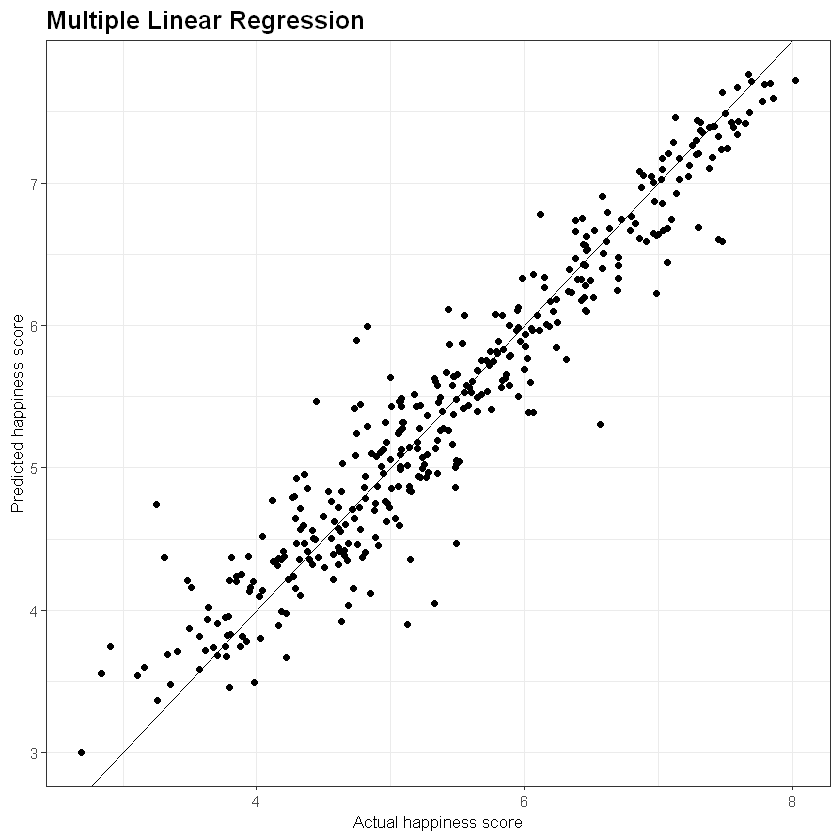

In [7]:
# 시각화
y_pred_lm = predict(model_nor, newdata = test_set)
Pred_Actual_lm <- as.data.frame(cbind(Prediction = y_pred_lm, Actual = test_set$HS))
library(ggplot2)
gg.lm <- ggplot(Pred_Actual_lm, aes(Actual, Prediction )) +
  geom_point() + theme_bw() + geom_abline() +
  labs(title = "Multiple Linear Regression", x = "Actual happiness score",
       y = "Predicted happiness score") +
  theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)), 
        axis.title = element_text(family = "Helvetica", size = (10)))
gg.lm

# 2. Multiple Linear Regression (HS^2~country+...)

In [9]:
# 모델 만들기 HS^2~ country + ...)
model_nor2 <-lm(HS^2 ~ country +log_gdp + social + life_exp + freedom + generosity + corruption + schooling +
                 alcohol + suicide + obesity + birth + mental, data=dfnor)
summary(model_nor2)



Call:
lm(formula = HS^2 ~ country + log_gdp + social + life_exp + freedom + 
    generosity + corruption + schooling + alcohol + suicide + 
    obesity + birth + mental, data = dfnor)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.9790  -2.1549  -0.1258   2.0441  14.7620 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       3.82092    4.00224   0.955 0.339865    
countryAlbania                   -0.23231    2.64788  -0.088 0.930098    
countryAlgeria                    3.66269    2.48236   1.475 0.140265    
countryAngola                   -14.18484    2.76302  -5.134 3.16e-07 ***
countryArgentina                  2.14542    2.95331   0.726 0.467664    
countryArmenia                   -1.51526    2.85458  -0.531 0.595613    
countryAustralia                  3.73334    4.04120   0.924 0.355711    
countryAustria                    2.99478    3.78524   0.791 0.428953    
countryAzerbaijan             

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"

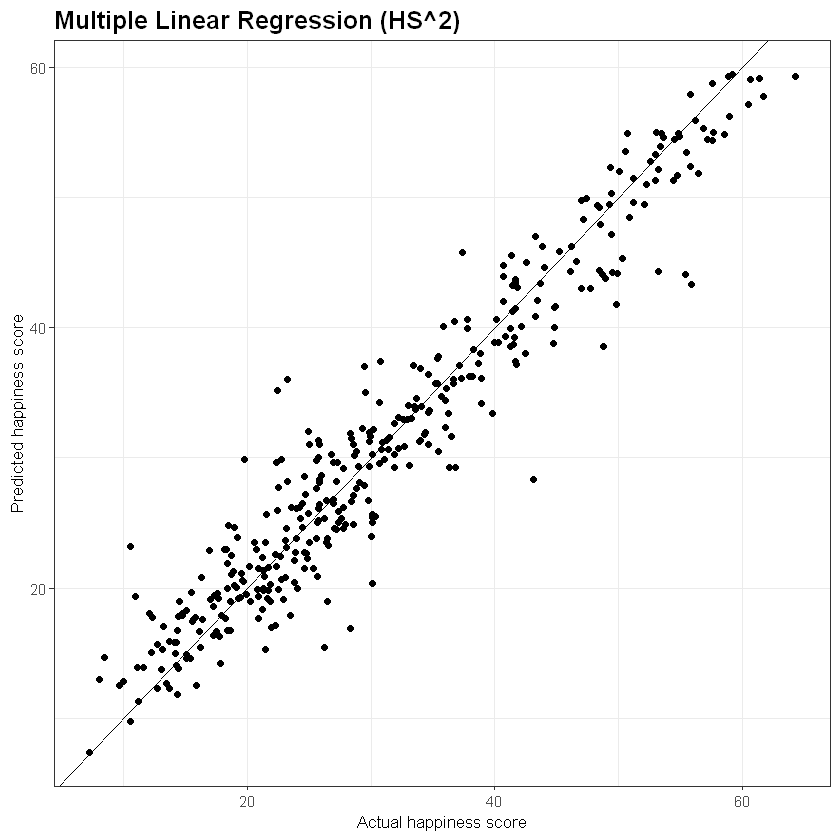

In [10]:
# 시각화
y_pred_lm = predict(model_nor2, newdata = test_set)
Pred_Actual_lm2 <- as.data.frame(cbind(Prediction = y_pred_lm, Actual = (test_set$HS)^2))
gg.lm2 <- ggplot(Pred_Actual_lm2, aes(Actual, Prediction )) +
  geom_point() + theme_bw() + geom_abline() +
  labs(title = "Multiple Linear Regression (HS^2)", x = "Actual happiness score",
       y = "Predicted happiness score") +
  theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)), 
        axis.title = element_text(family = "Helvetica", size = (10)))
gg.lm2

# 3. SVR

In [13]:
# SVR 알고리즘 모델 만들기
# install.packages('e1071')
library(e1071)
regressor_svr = svm(formula = HS ~ country +log_gdp + social + life_exp + freedom + generosity + corruption + schooling +
                      alcohol + suicide + obesity + birth + mental,
                    data = dfnor,
                    type = 'eps-regression',
                    kernel = 'radial')

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"

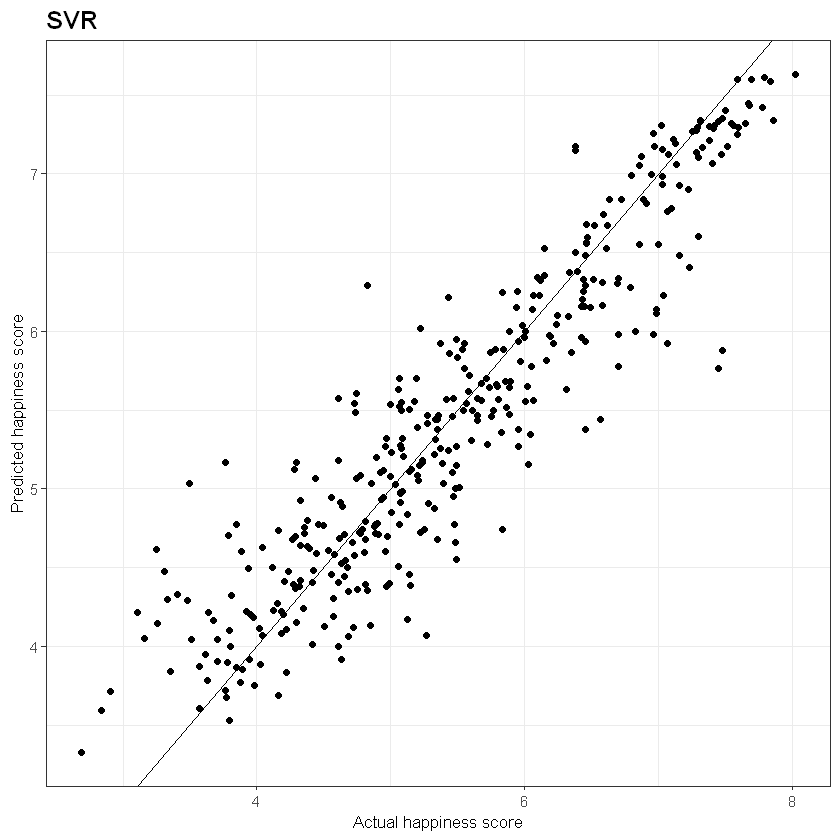

In [14]:
# 시각화
y_pred_svr = predict(regressor_svr,  newdata = test_set)
Pred_Actual_svr <- as.data.frame(cbind(Prediction = y_pred_svr, Actual = test_set$HS))
Pred_Actual_lm.versus.svr <- cbind(Prediction.lm = y_pred_lm, Prediction.svr = y_pred_svr, Actual = test_set$HS)
gg.svr <- ggplot(Pred_Actual_svr, aes(Actual, Prediction )) +
  geom_point() + theme_bw() + geom_abline() +
  labs(title = "SVR", x = "Actual happiness score",
       y = "Predicted happiness score") +
  theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)), 
        axis.title = element_text(family = "Helvetica", size = (10)))
gg.svr

# 4. Decision Tree

In [15]:
# Decision Tree 알고리즘 모델 만들기
library(rpart)
regressor_dt = rpart(formula = HS ~ continent +log_gdp + social + life_exp + freedom + generosity + corruption + schooling +
                       alcohol + suicide + obesity + birth + mental,
                     data = dfnor,
                     control = rpart.control(minsplit = 10))

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"

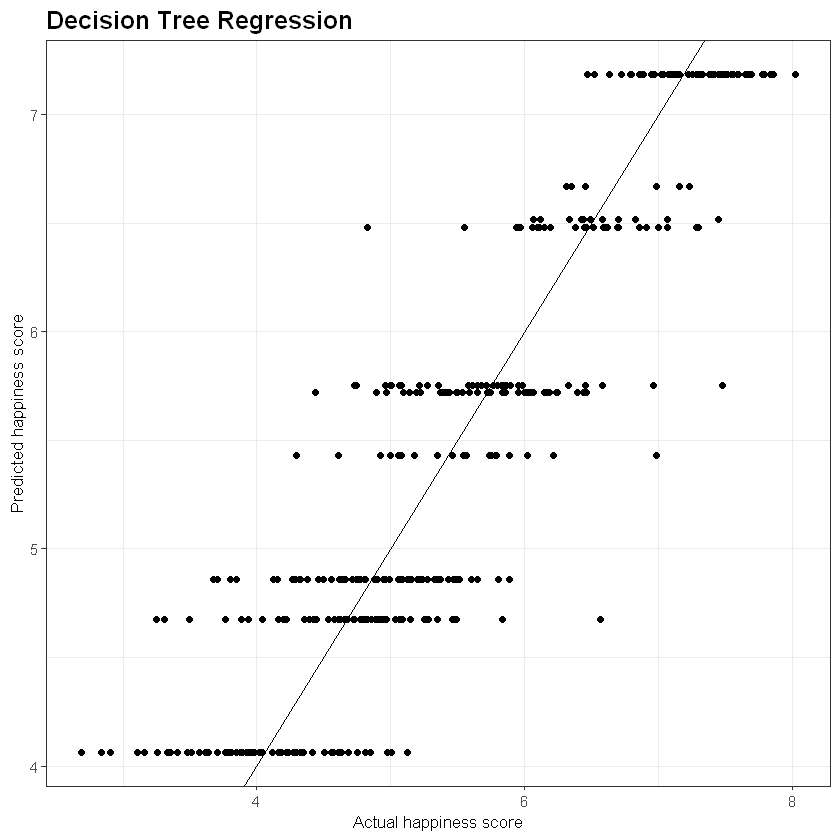

In [16]:
# 시각화 (그래프)
y_pred_dt = predict(regressor_dt, newdata = test_set)

Pred_Actual_dt <- as.data.frame(cbind(Prediction = y_pred_dt, Actual = test_set$HS))


gg.dt <- ggplot(Pred_Actual_dt, aes(Actual, Prediction )) +
  geom_point() + theme_bw() + geom_abline() +
  labs(title = "Decision Tree Regression", x = "Actual happiness score",
       y = "Predicted happiness score") +
  theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)), 
        axis.title = element_text(family = "Helvetica", size = (10)))
gg.dt

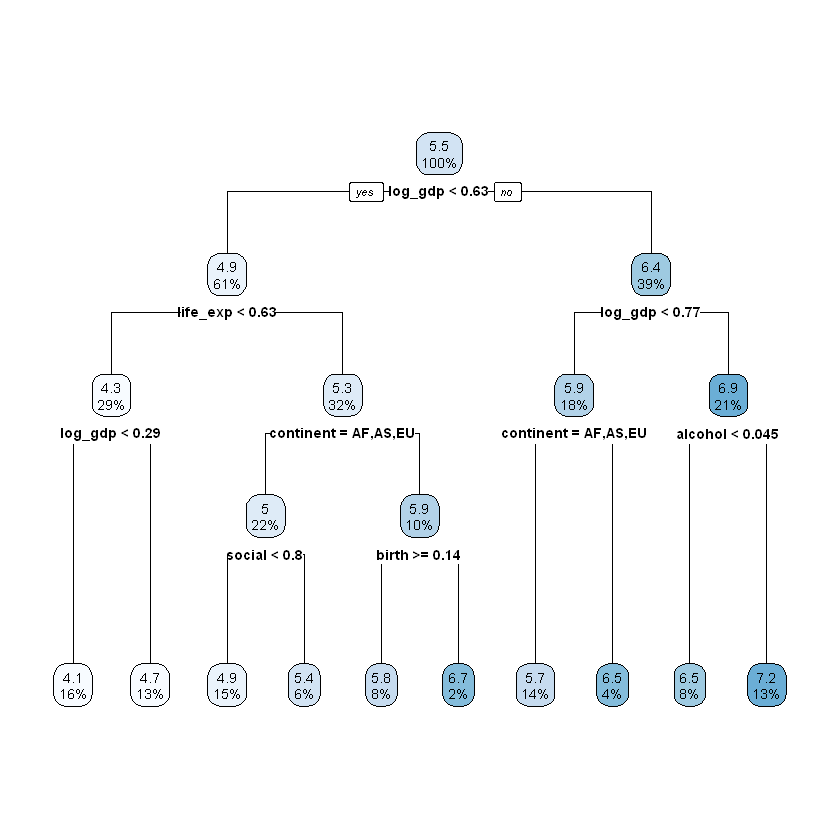

In [24]:
# 가지치기 ver.1
# install.packages('rpart.plot')
# install.packages('rattle')
# install.packages('RColorBrewer')

library(rpart.plot)
library(rattle)
library(RColorBrewer)
rpart.plot(regressor_dt) 


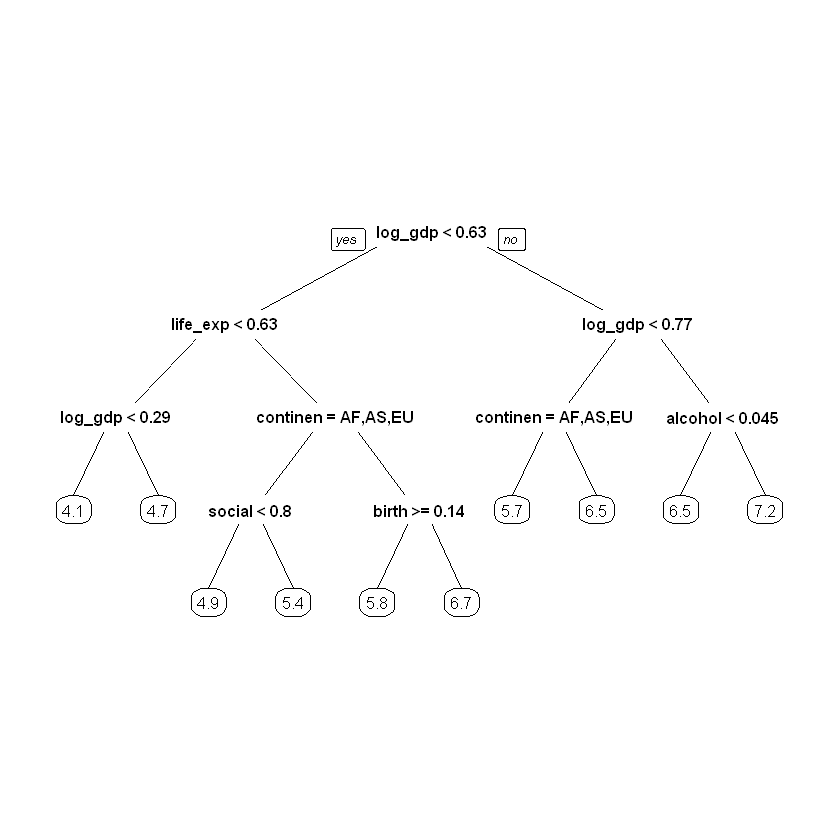

In [23]:
# 가지치기 ver.2
prp(regressor_dt)

# 5. Random Forest

In [25]:
# Random Forest 알고리즘 모델 만들기
library(randomForest)
set.seed(4)
# Can not handle categorical predictors with more than 53 categories. error
# country -> continent 로 변경
regressor_rf = randomForest(x = dfnor[c("continent", "log_gdp","social","life_exp","freedom","generosity","corruption","schooling","alcohol","suicide","obesity","birth","mental")],
                            y = dfnor$HS,
                            ntree = 500)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:rattle':

    importance

The following object is masked from 'package:ggplot2':

    margin



Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"

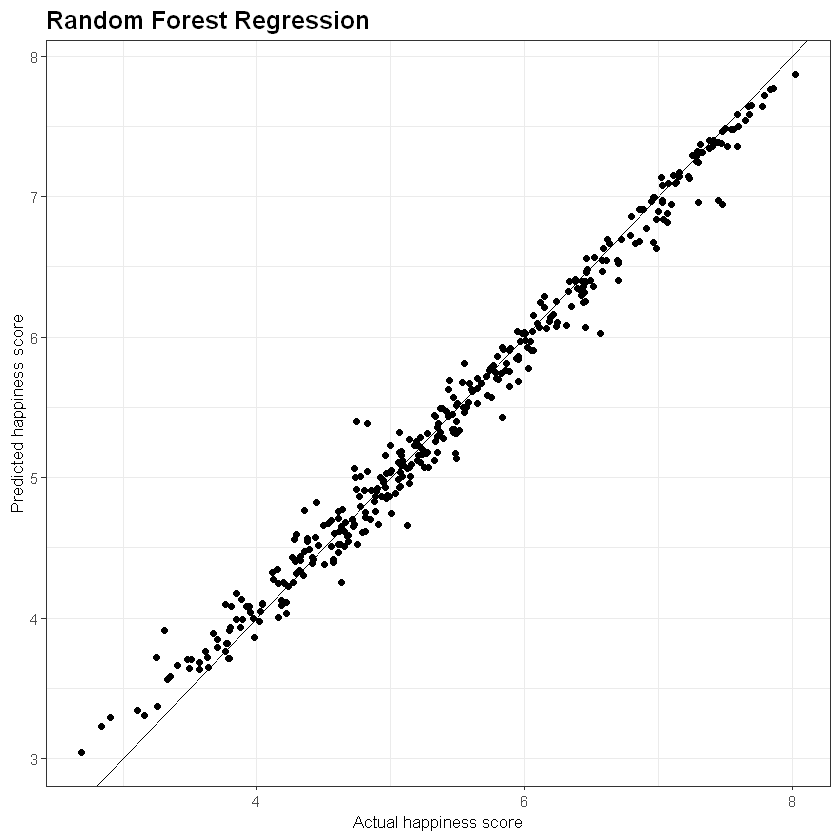

In [26]:
# 시각화
y_pred_rf = predict(regressor_rf, newdata = test_set)
Pred_Actual_rf <- as.data.frame(cbind(Prediction = y_pred_rf, Actual = test_set$HS))
gg.rf <- ggplot(Pred_Actual_rf, aes(Actual, Prediction )) +
  geom_point() + theme_bw() + geom_abline() +
  labs(title = "Random Forest Regression", x = "Actual happiness score",
       y = "Predicted happiness score") +
  theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)), 
        axis.title = element_text(family = "Helvetica", size = (10)))
gg.rf


# 6. Neural Net

In [ ]:
# 모델& 시각화
# 구동하는데 오래 걸림...
library(neuralnet)

nn <- neuralnet(HS~ log_gdp+ social+ life_exp+ freedom+ generosity+ corruption+ schooling+ 
                  alcohol + suicide + obesity + birth + mental, data=dfnor, hidden = 10, linear.output=TRUE, stepmax=1e7)
plot(nn)

predicted.nn.values <- compute(nn,test_set[c("continent", "log_gdp","social","life_exp","freedom","generosity","corruption","schooling","alcohol","suicide","obesity","birth","mental")])

Pred_Actual_nn <- as.data.frame(cbind(Prediction = predicted.nn.values$net.result, Actual = test_set$HS))

gg.nn <- ggplot(Pred_Actual_nn, aes(Actual, V1 )) +
  geom_point() + theme_bw() + geom_abline() +
  labs(title = "Neural Net", x = "Actual happiness score",
       y = "Predicted happiness score") +
  theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)), 
        axis.title = element_text(family = "Helvetica", size = (10)))
gg.nn


# 7. 총정리

In [41]:
library(ggpubr)
library(gridExtra)

Warning message:
"package 'ggpubr' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'ggpubr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'broom' 0.5.2 is being loaded, but >= 0.7.4 is required


In [38]:
# Neural Net 제외하고 출력
ggarrange(gg.lm, gg.lm2, gg.svr, gg.dt, gg.rf, ncol = 2, nrow = 3)

ERROR: Error in ggarrange(gg.lm, gg.lm2, gg.svr, gg.dt, gg.rf, ncol = 2, nrow = 3): 함수 "ggarrange"를 찾을 수 없습니다
